In [11]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset form the given dataset and take the brief look through the dataset

In [12]:
csv_path = "D:/year 3/hk2/Machine Learning/testcode/media prediction and its cost.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}")
df = pd.read_csv(csv_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

## the first 5 row of the dataset

In [13]:
df.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


## Visualize all the object columns base on their frequency of appearences

food_category :
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous']


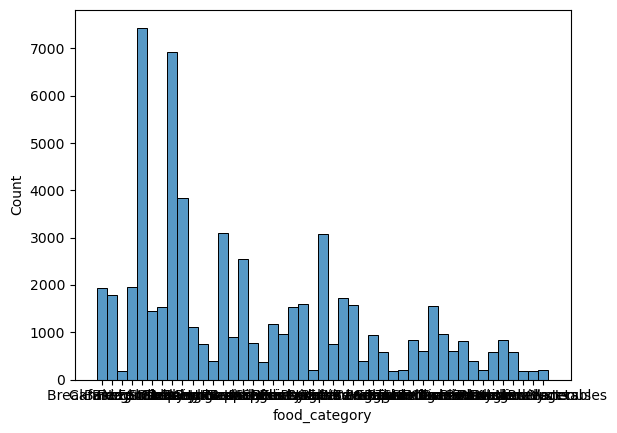

****************************************
food_department :
['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 'Breakfast Foods' 'Checkout' 'Carousel']


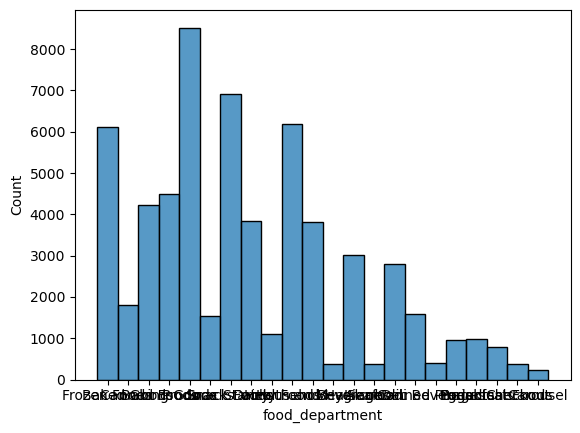

****************************************
food_family :
['Food' 'Non-Consumable' 'Drink']


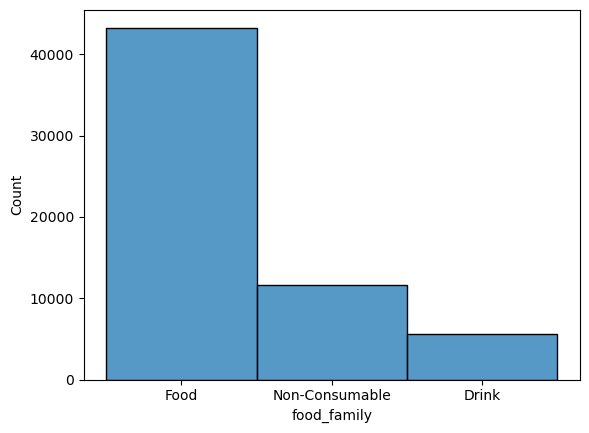

****************************************
promotion_name :
['Bag Stuffers' 'Cash Register Lottery' 'High Roller Savings'
 'Double Down Sale' 'Green Light Days' 'Big Time Savings' 'Price Savers'
 'Price Slashers' 'Dollar Days' 'Two Day Sale' 'Super Duper Savers'
 'Weekend Markdown' 'Dollar Cutters' 'Sales Galore' 'Big Promo'
 'Free For All' 'Savings Galore' 'Unbeatable Price Savers'
 'Price Smashers' 'Shelf Clearing Days' 'Sales Days' 'Go For It'
 'Super Savers' 'Wallet Savers' 'Save-It Sale' 'Price Destroyers'
 'Two for One' 'Big Time Discounts' 'Shelf Emptiers' 'Bye Bye Baby'
 'One Day Sale' 'Fantastic Discounts' 'Saving Days' 'You Save Days'
 'Sale Winners' 'Coupon Spectacular' 'Three for One' 'Price Winners'
 'Dimes Off' 'I Cant Believe It Sale' 'Money Savers' 'Green Light Special'
 'Price Cutters' 'Tip Top Savings' 'Best Savings' 'Pick Your Savings'
 'Double Your Savings' 'Mystery Sale' 'Super Wallet Savers']


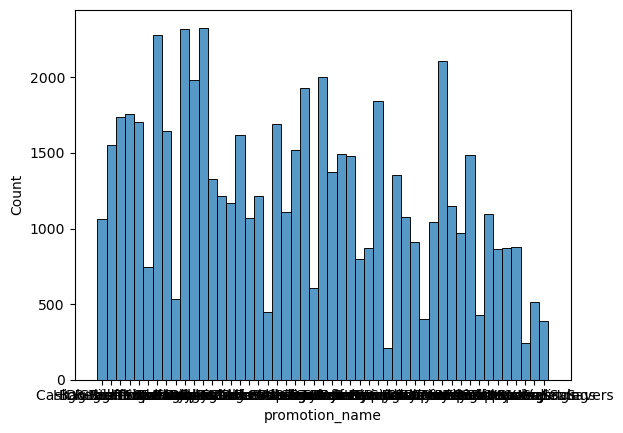

****************************************
sales_country :
['USA' 'Mexico' 'Canada']


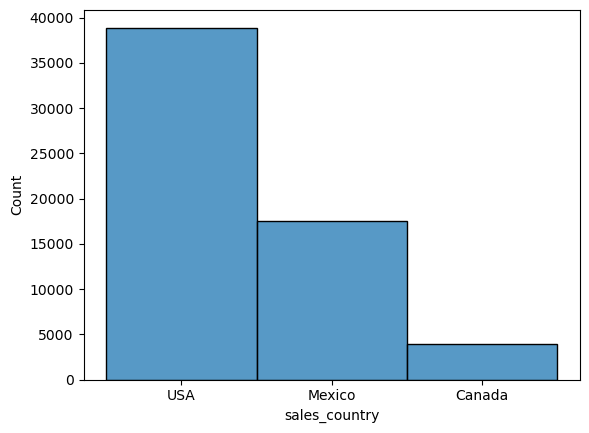

****************************************
marital_status :
['M' 'S']


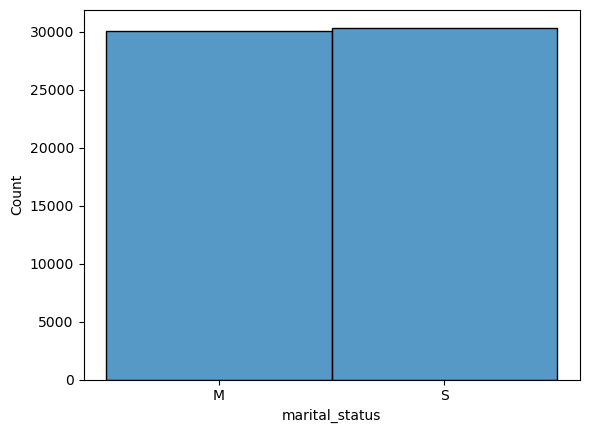

****************************************
gender :
['F' 'M']


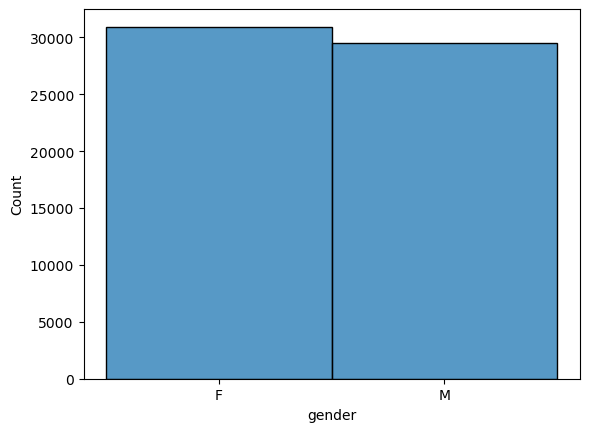

****************************************
education :
['Partial High School' 'Bachelors Degree' 'High School Degree'
 'Graduate Degree' 'Partial College']


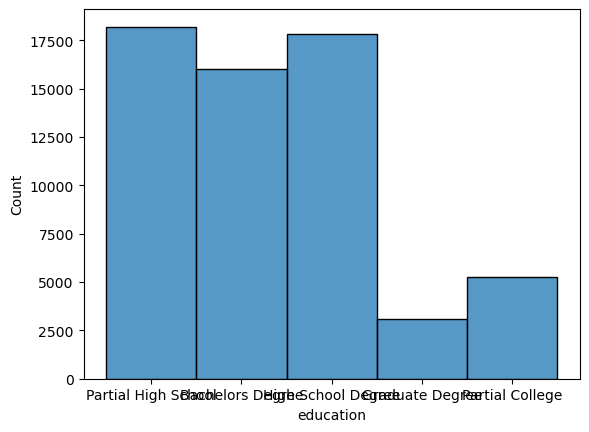

****************************************
member_card :
['Normal' 'Silver' 'Bronze' 'Golden']


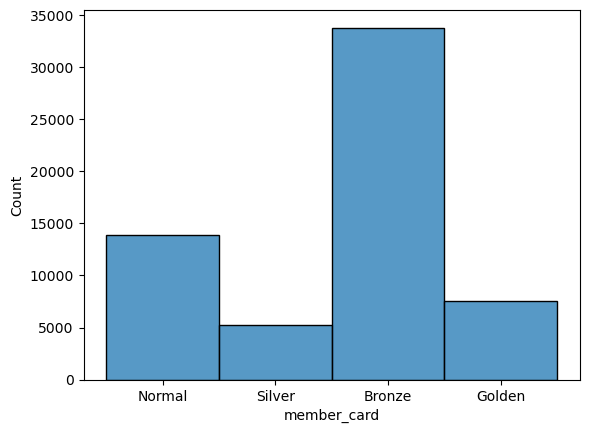

****************************************
occupation :
['Skilled Manual' 'Professional' 'Manual' 'Management' 'Clerical']


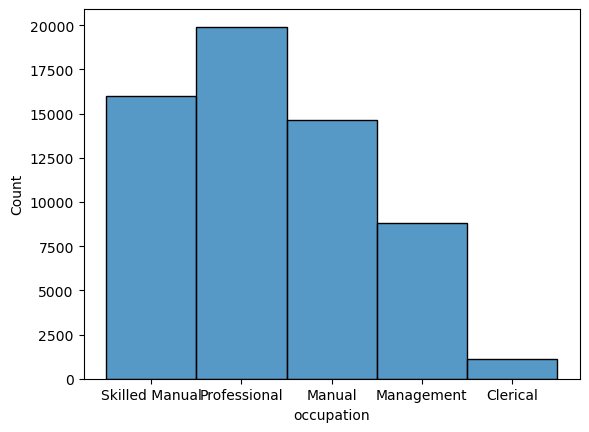

****************************************
houseowner :
['Y' 'N']


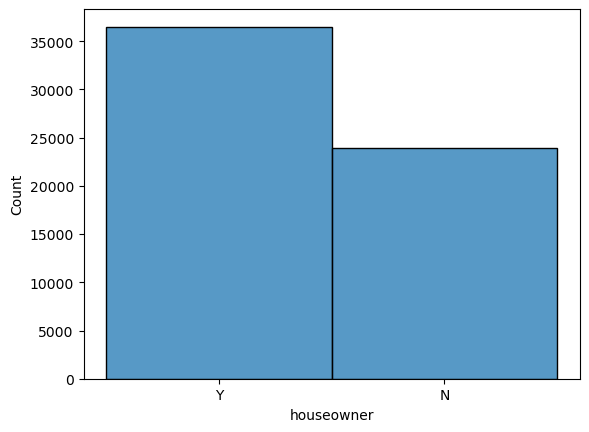

****************************************
avg. yearly_income :
['$10K - $30K' '$50K - $70K' '$30K - $50K' '$70K - $90K' '$110K - $130K'
 '$130K - $150K' '$150K +' '$90K - $110K']


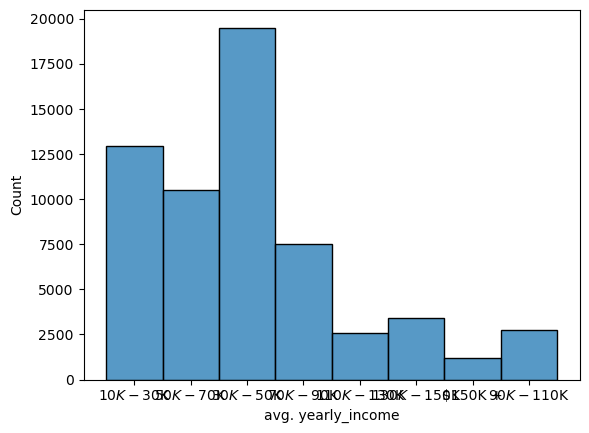

****************************************
brand_name :
['Carrington' 'Golden' 'Imagine' 'Big Time' 'PigTail' 'Fantastic' 'Great'
 'Sphinx' 'Modell' 'Colony' 'Blue Label' 'Pleasant' 'Bravo' 'Better'
 'Just Right' 'Plato' 'BBB Best' 'Landslide' 'Super' 'CDR' 'High Top'
 'Tri-State' 'Hermanos' 'Tell Tale' 'Ebony' 'Thresher' 'Gulf Coast'
 'Musial' 'Atomic' 'Choice' 'Fort West' 'Nationeel' 'Horatio'
 'Best Choice' 'Fast' 'Gorilla' 'Carlson' 'Even Better' 'Club' 'Booker'
 'Shady Lake' 'Monarch' 'Discover' 'Colossal' 'Medalist' 'Jardon'
 'Cormorant' 'Sunset' 'Red Wing' 'High Quality' 'Denny' 'Faux Products'
 'Steady' 'Consolidated' 'Bird Call' 'Hilltop' 'Ship Shape' 'Footnote'
 'Genteel' 'Quick' 'Gerolli' 'Excellent' 'Fabulous' 'Token' 'Skinner'
 'Washington' 'Dual City' 'Kiwi' 'Tip Top' 'Amigo' 'Curlew' 'Moms'
 'Cutting Edge' 'Red Spade' 'Lake' 'American' 'Walrus' 'Pearl' 'Good'
 'Top Measure' 'Portsmouth' 'Toucan' 'Applause' 'Swell' 'Green Ribbon'
 'Big City' 'National' 'Blue Medal' 'Urban' 

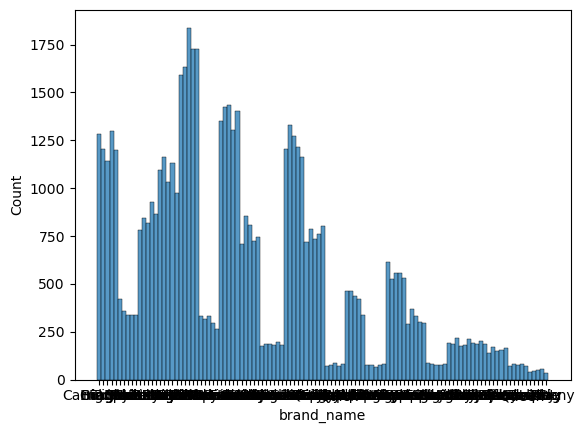

****************************************
store_type :
['Deluxe Supermarket' 'Supermarket' 'Gourmet Supermarket' 'Small Grocery'
 'Mid-Size Grocery']


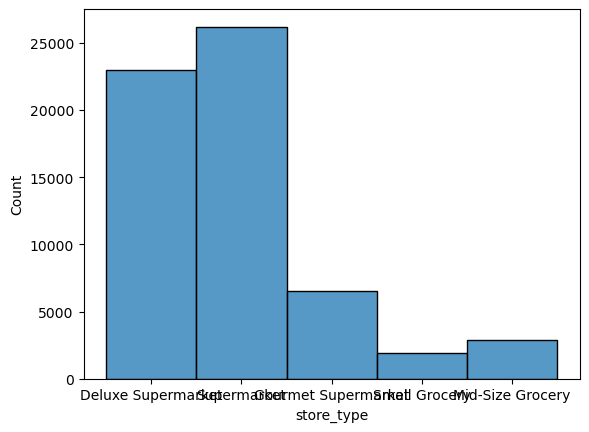

****************************************
store_city :
['Salem' 'Tacoma' 'Seattle' 'Spokane' 'Los Angeles' 'Beverly Hills'
 'Portland' 'Bellingham' 'Orizaba' 'Merida' 'Hidalgo' 'Mexico City'
 'Vancouver' 'Bremerton' 'Camacho' 'Guadalajara' 'Acapulco'
 'San Francisco' 'Victoria']


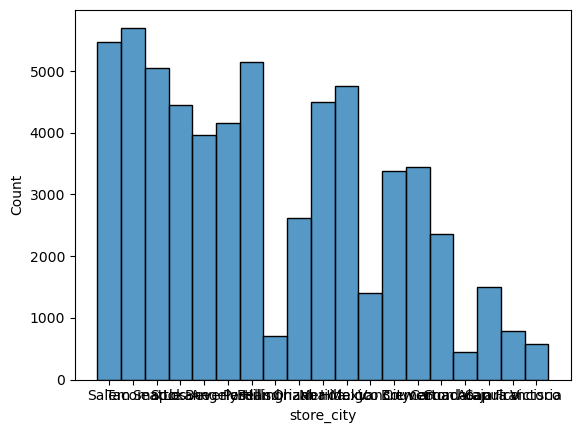

****************************************
store_state :
['OR' 'WA' 'CA' 'Veracruz' 'Yucatan' 'Zacatecas' 'DF' 'BC' 'Jalisco'
 'Guerrero']


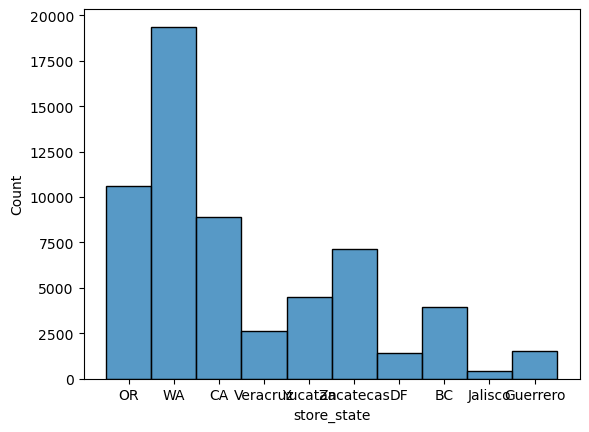

****************************************
media_type :
['Daily Paper, Radio' 'In-Store Coupon' 'Radio' 'Daily Paper'
 'Product Attachment' 'Sunday Paper, Radio' 'Sunday Paper, Radio, TV'
 'Sunday Paper' 'Street Handout' 'TV' 'Bulk Mail' 'Cash Register Handout'
 'Daily Paper, Radio, TV']


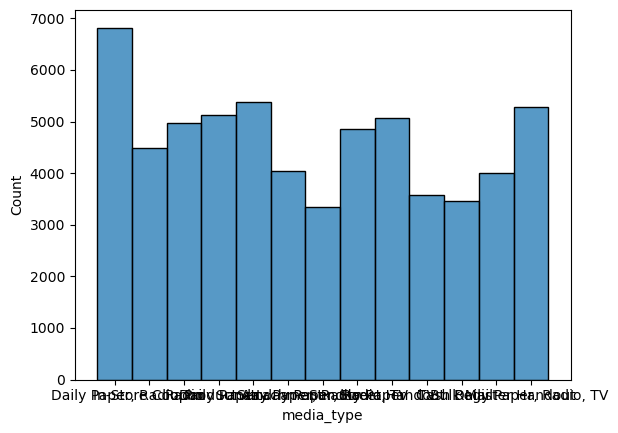

****************************************


In [14]:
for col in df.select_dtypes('object').columns:
    print(col+" :")
    print(df[col].unique())
    sns.histplot(df[col])
    plt.show()
    print("*"*40)

## Visualize all the float columns base on their frequency of appearences

store_sales(in millions) :


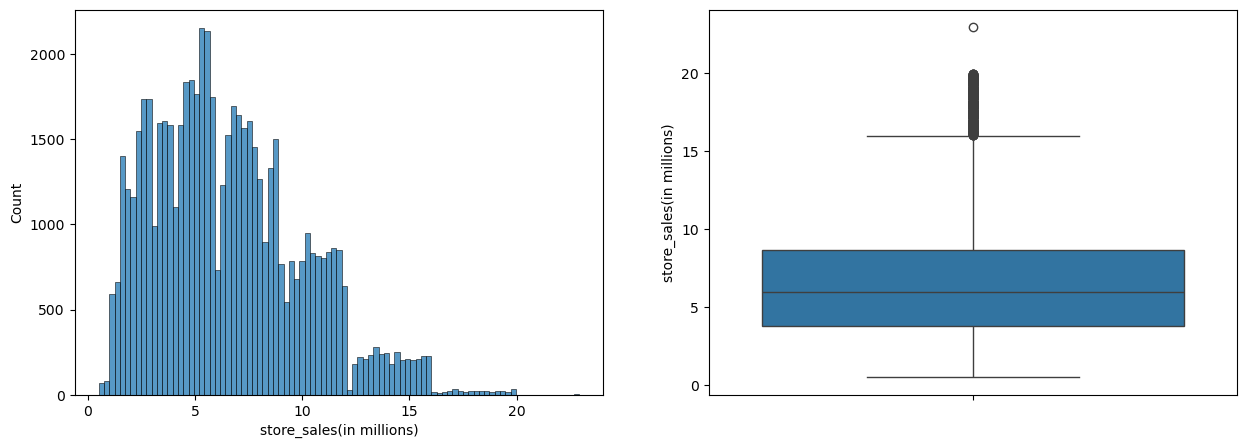

****************************************
store_cost(in millions) :


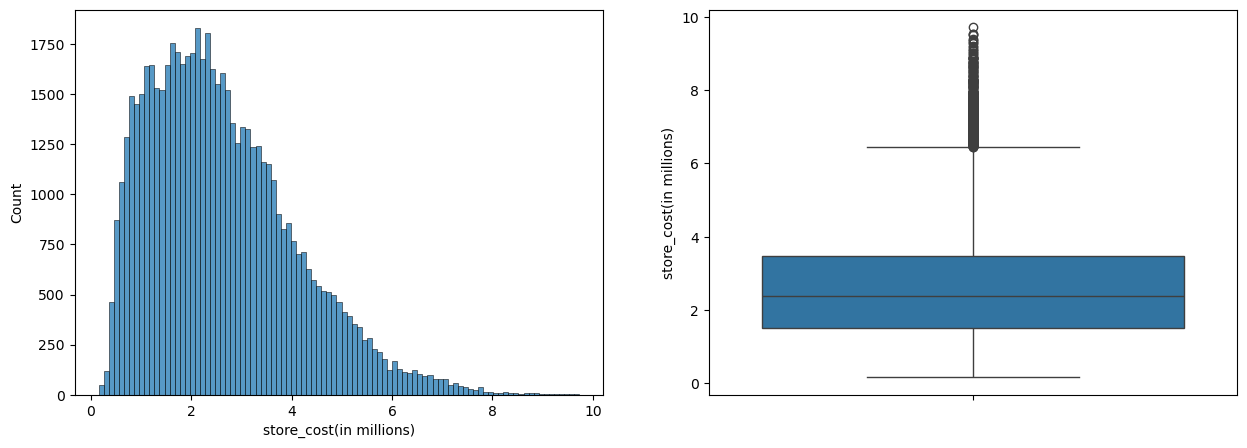

****************************************
unit_sales(in millions) :


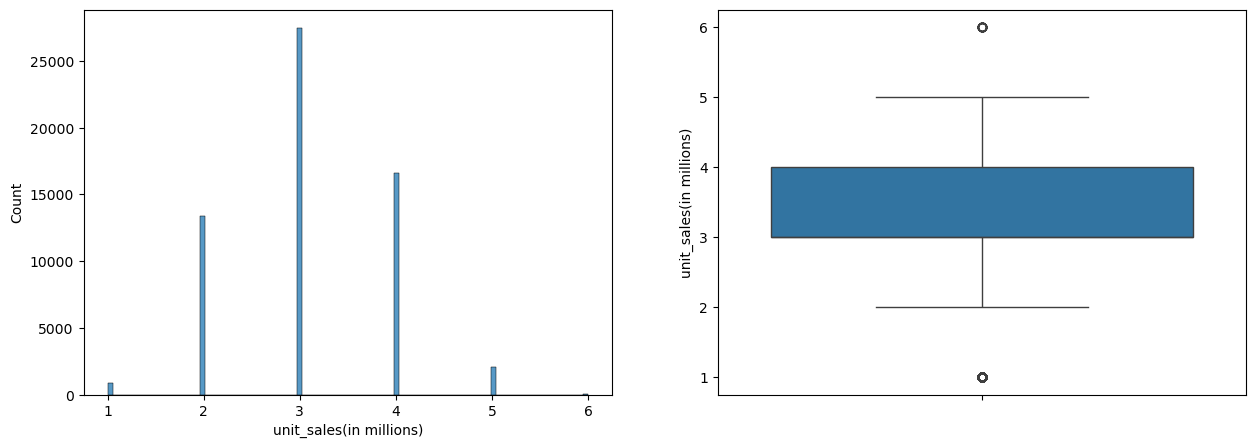

****************************************
total_children :


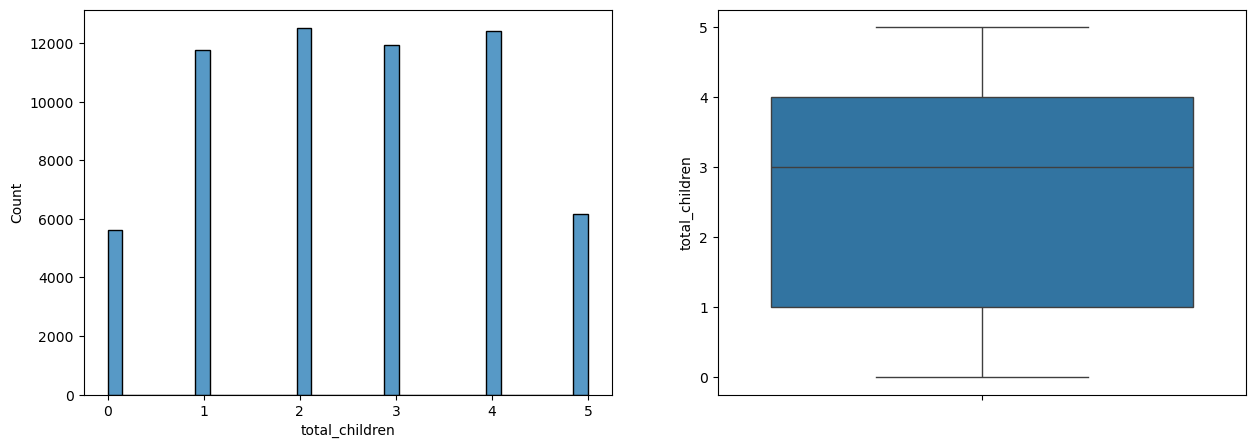

****************************************
avg_cars_at home(approx) :


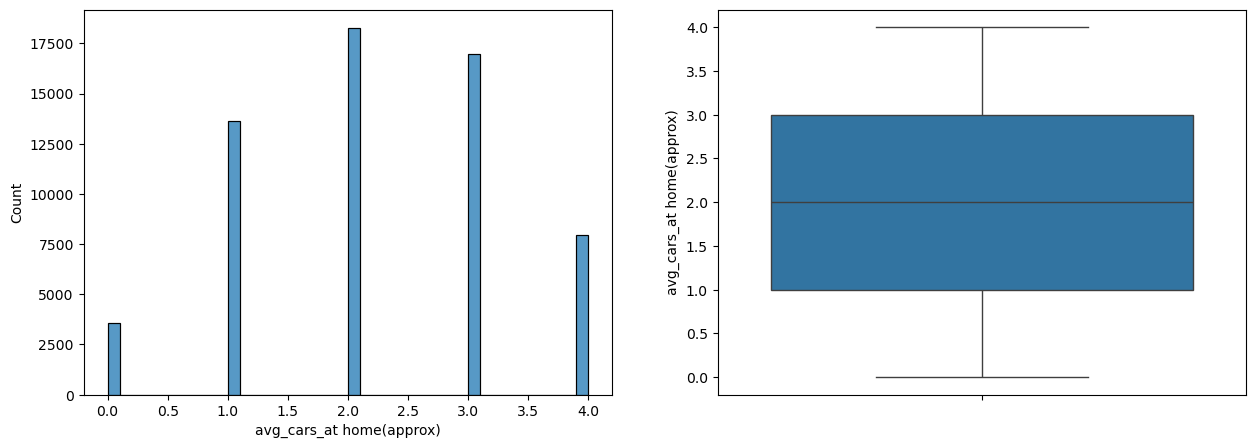

****************************************
num_children_at_home :


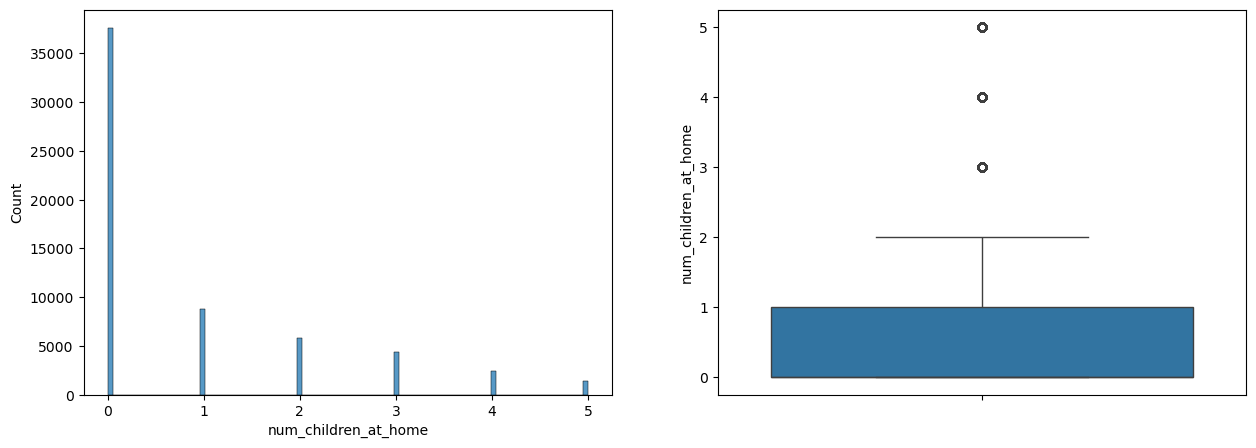

****************************************
avg_cars_at home(approx).1 :


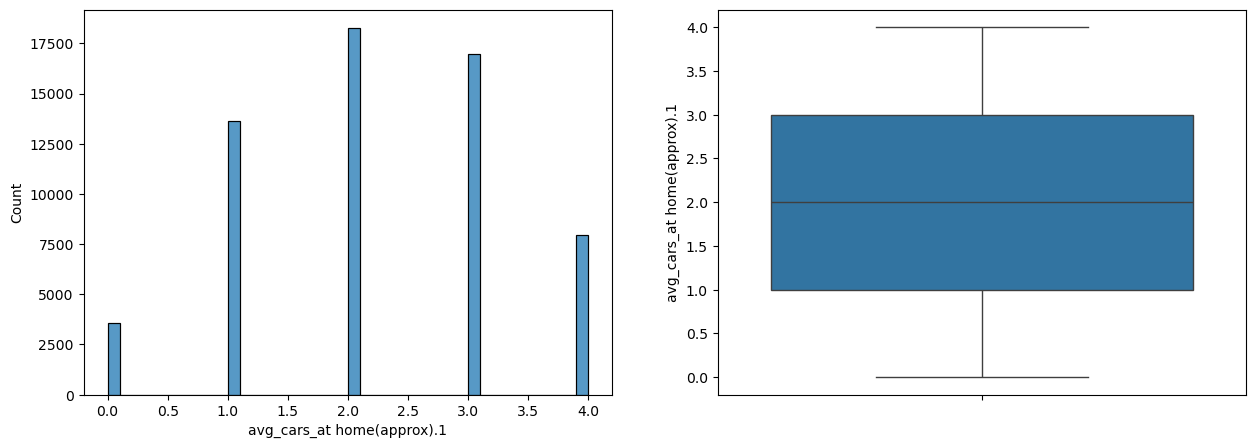

****************************************
SRP :


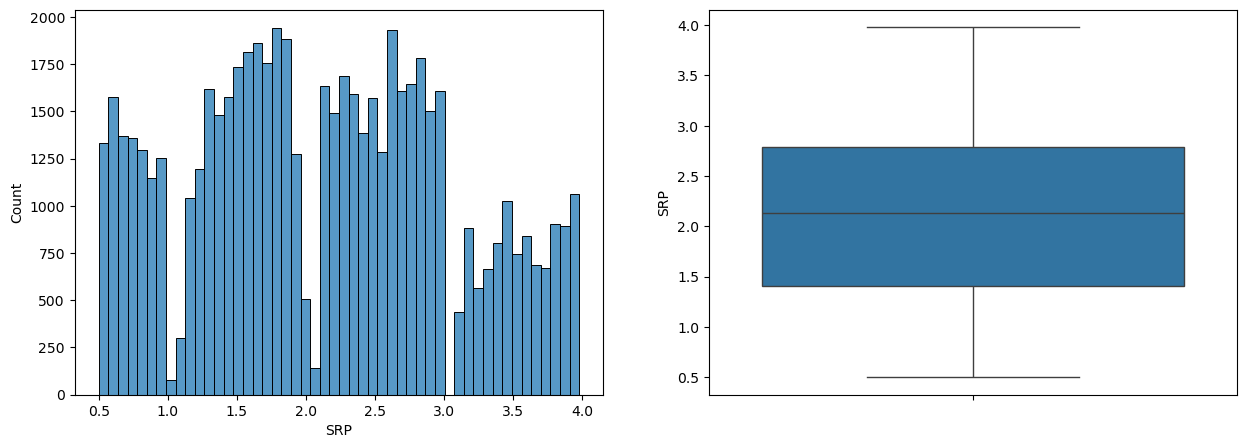

****************************************
gross_weight :


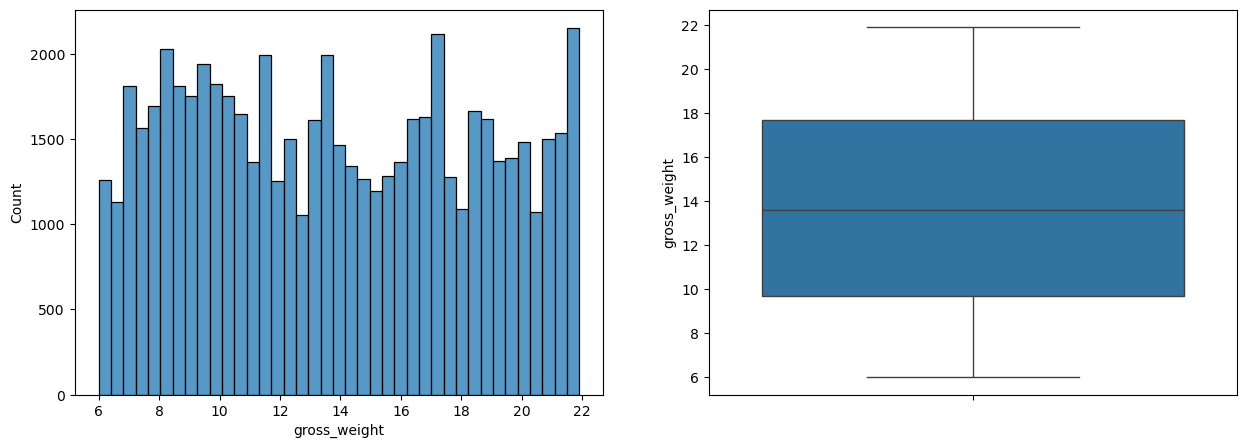

****************************************
net_weight :


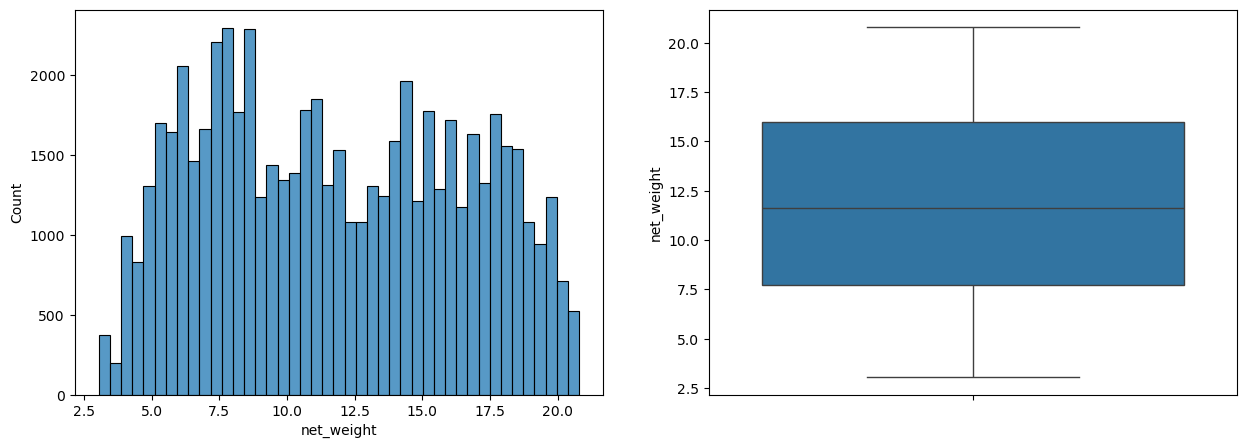

****************************************
recyclable_package :


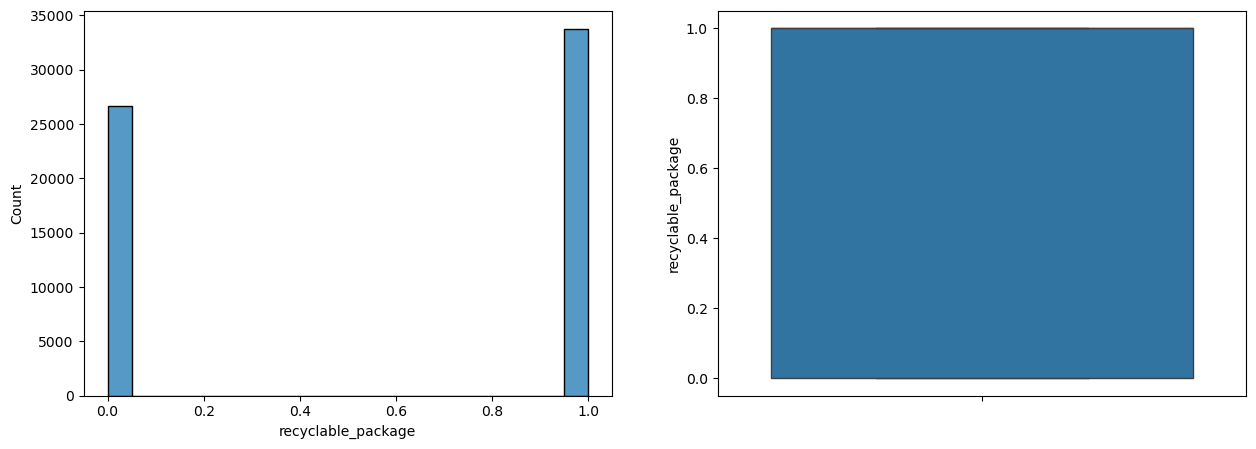

****************************************
low_fat :


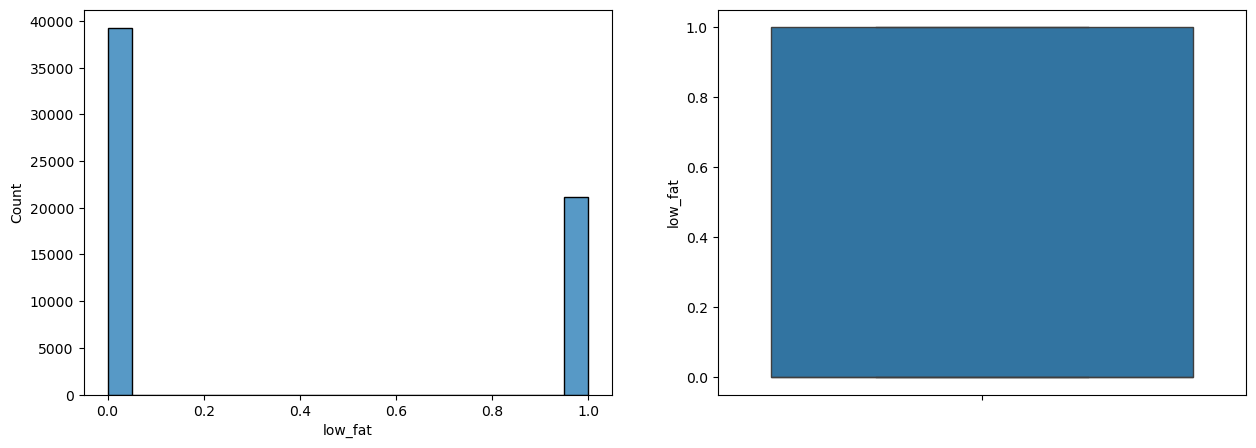

****************************************
units_per_case :


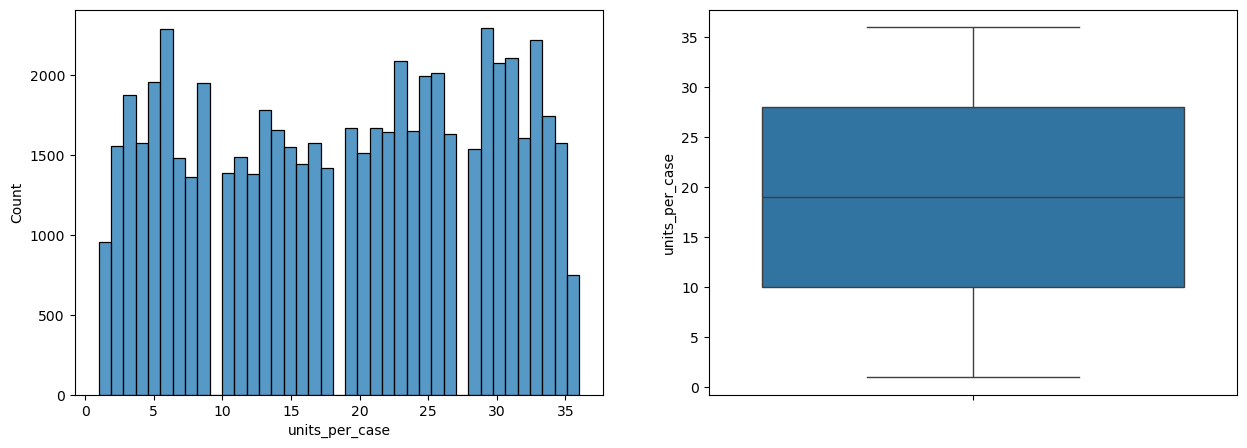

****************************************
store_sqft :


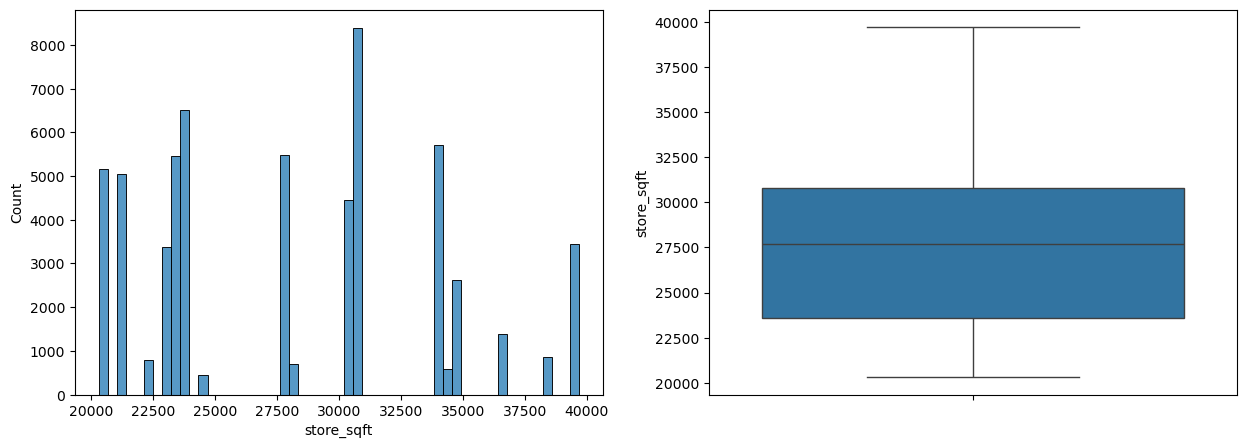

****************************************
grocery_sqft :


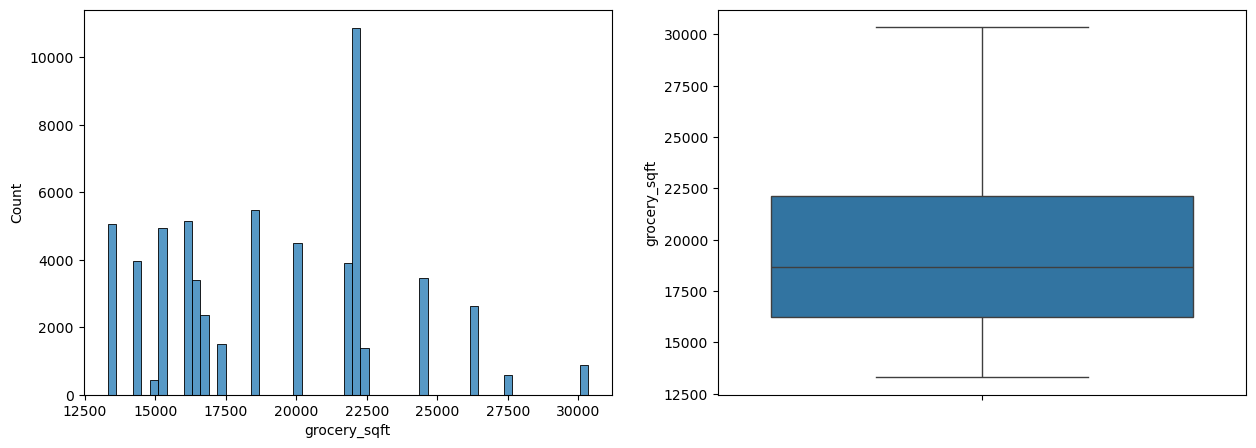

****************************************
frozen_sqft :


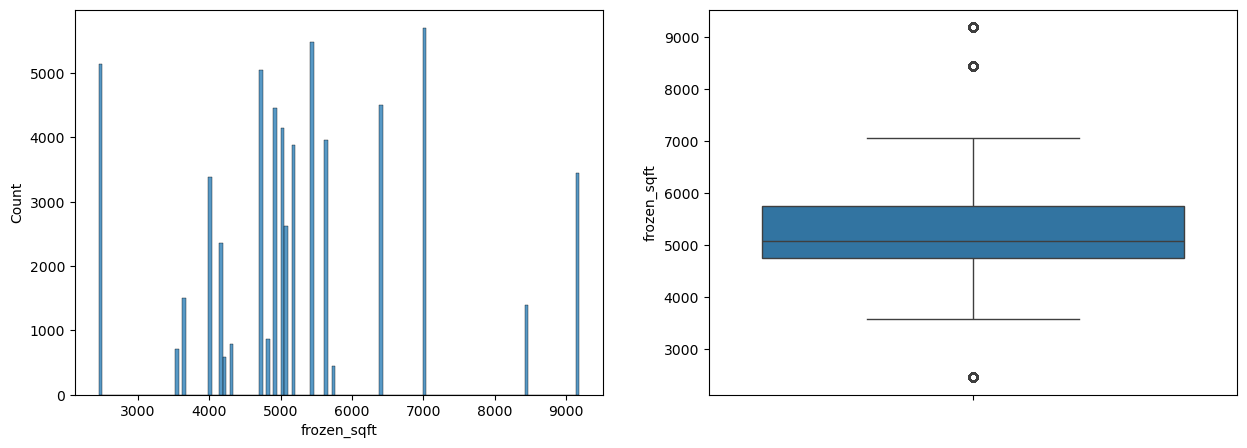

****************************************
meat_sqft :


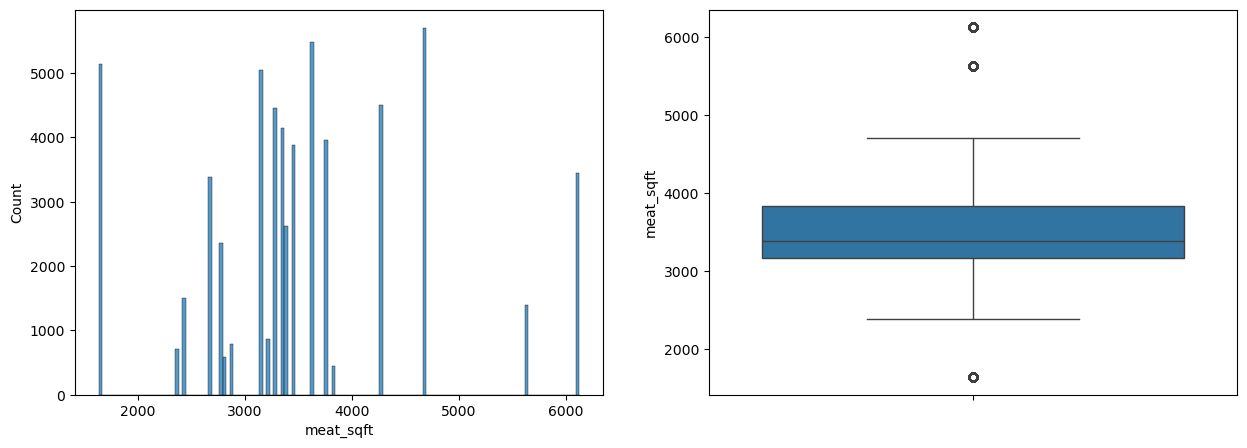

****************************************
coffee_bar :


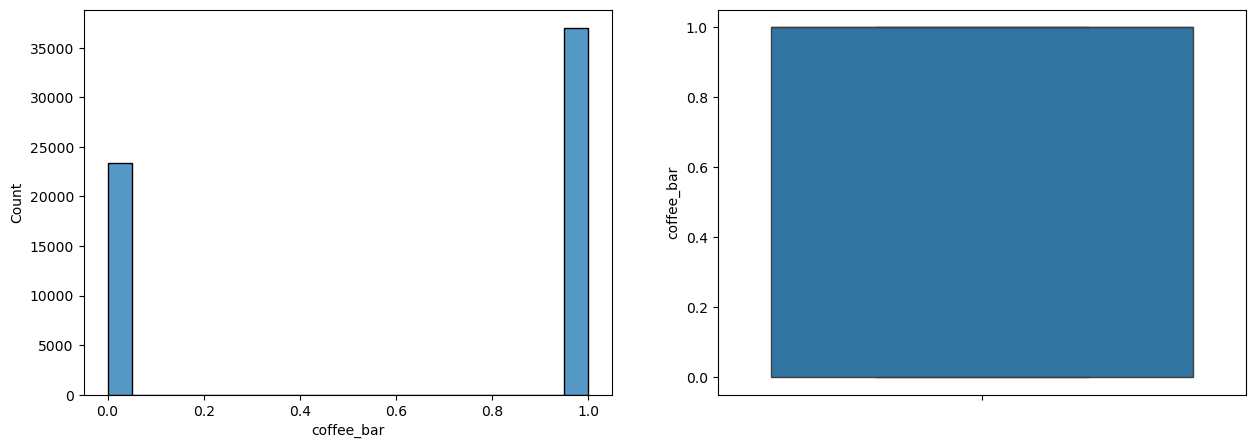

****************************************
video_store :


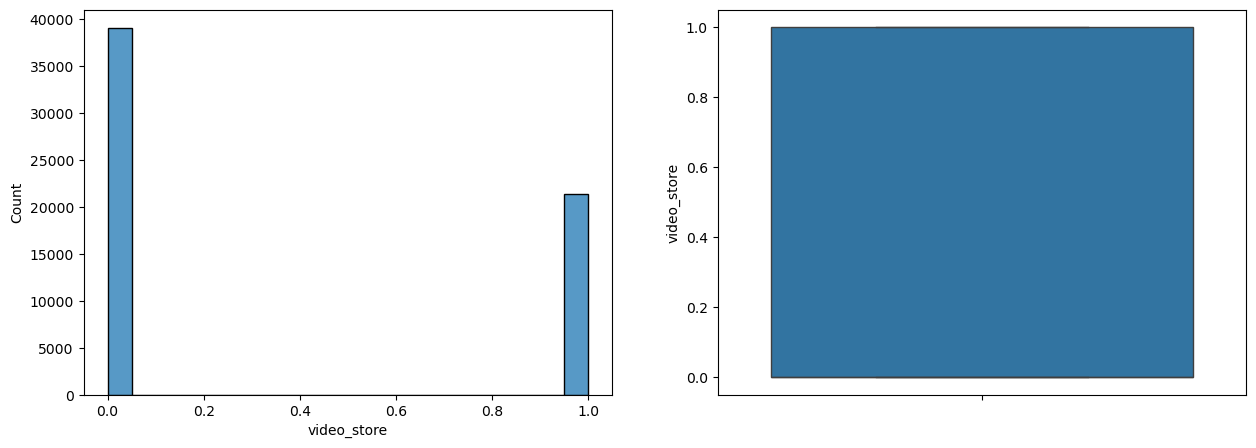

****************************************
salad_bar :


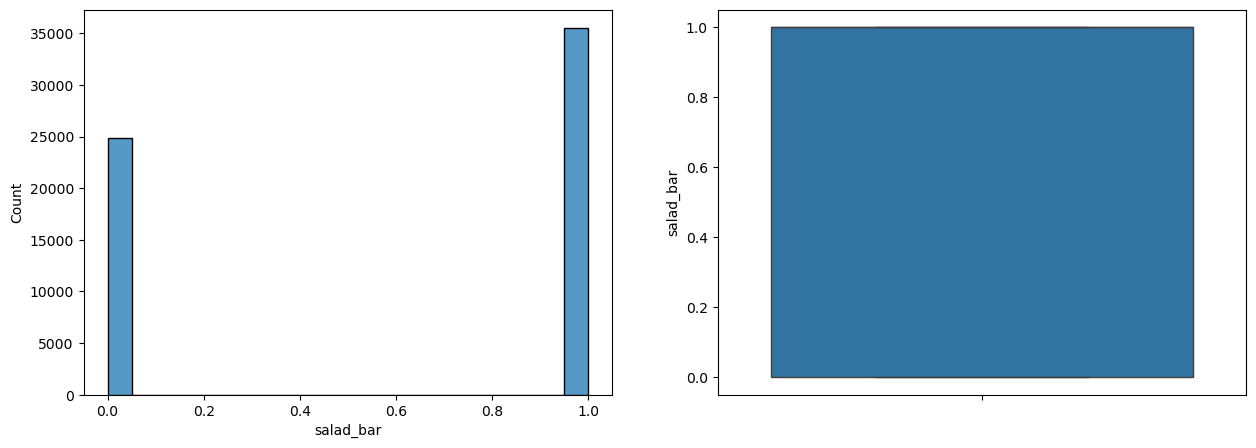

****************************************
prepared_food :


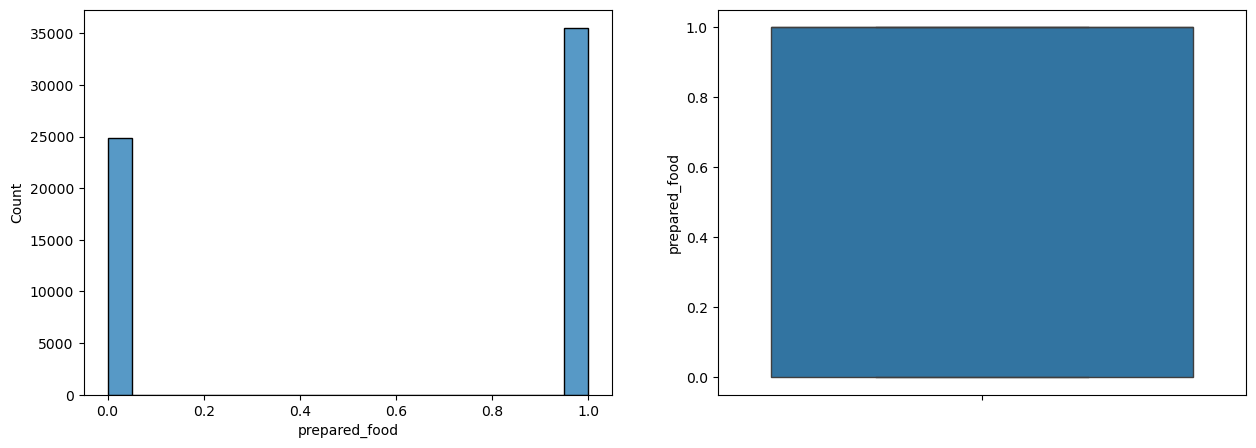

****************************************
florist :


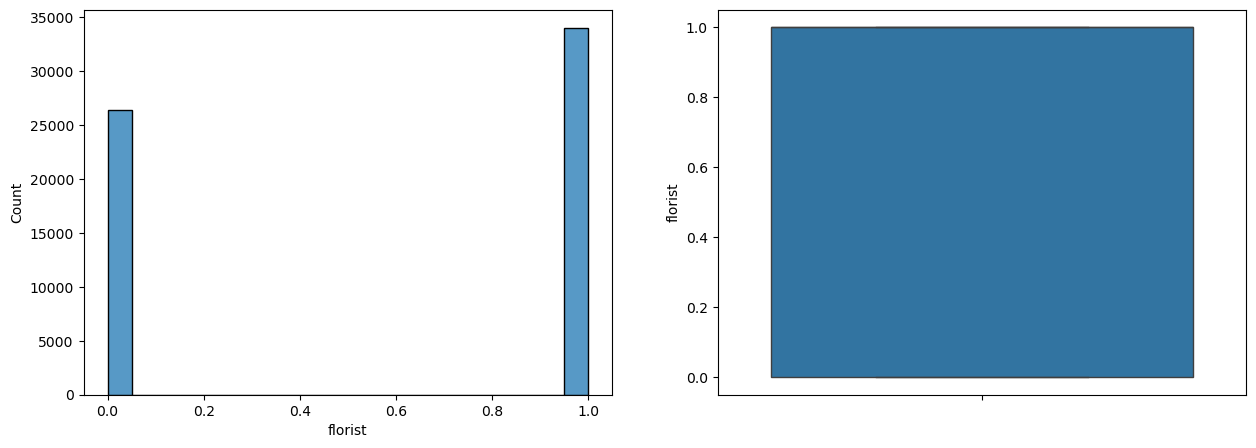

****************************************
cost :


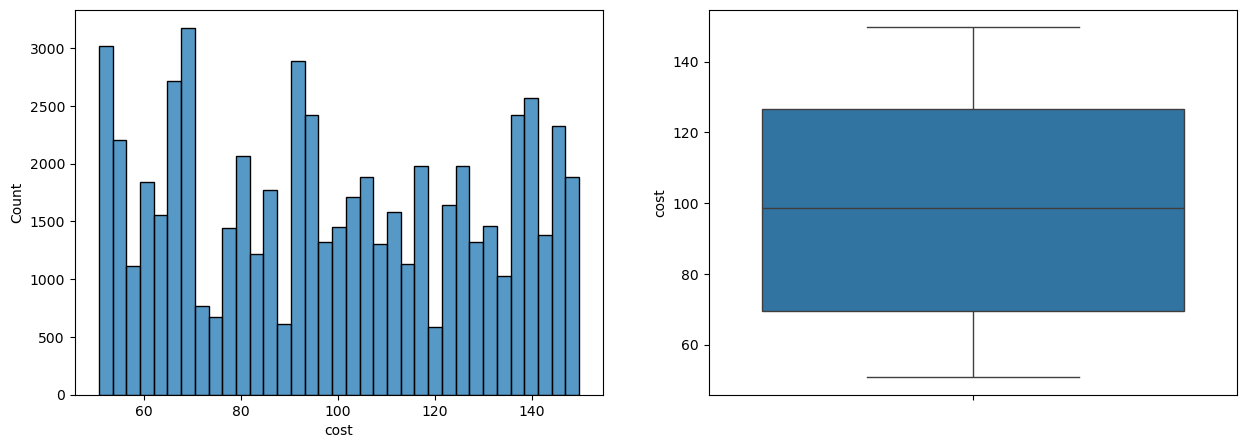

****************************************


In [15]:
for col in df.select_dtypes('float').columns:
    print(col+" :")
    # print(df[col].unique())
    fig, axes = plt.subplots(1, 2,figsize=(15, 5))
    sns.histplot(df[col],ax=axes[0])
    sns.boxplot(df[col],ax=axes[1])
    plt.show()
    print("*"*40)